# Rossmann Store Sales Prediction

Kaggle Competition:
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

We're accepting Rossmann's challenge to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, we will help store managers stay focused on what’s most important to them: their customers and their teams!                                                                                                

![ASW_Corp_Site_Header_Our_Portfolio_Rossmann.jpg](https://user-images.githubusercontent.com/32555702/37235455-ada03b6a-23b3-11e8-9a53-0df7a4b704bc.jpg)

### Project Requirements
- Must use a Regression technique
- Must deploy model you created (not just calling out to Azure, AWS, or Google AI API).
- Must use a real data set (not fake data set, i.e. randomly generated numbers)
- Juypter Notebook Documentation
- Must explain in detail accuracy of model
- Explain the tradeoffs you made
- Do exploratory data exploration

## Table of Contents
1. [Import Packages](#1-bullet) <br>
2. [Data Preparation](#2-bullet) <br>
2.1 [Load Dataset](#2.1-bullet) <br>
2.2 [Dealing With Missing Values](#2.2-bullet) <br>
2.2.1 [Count missing values in each dataset](#2.2.1-bullet) <br>
2.2.2 [Remove features with high percentages of missing values](#2.2.2-bullet) <br>
2.2.3 [Replace missing values in features with low percentages of missing values](#2.2.3-bullet) <br>
2.3 [Date Extraction](#2.3-bullet) <br>
2.4 [Joining Tables](#2.4-bullet) <br>
2.5 [Drop Subsets Of Data Which Might Cause Bias](#2.5-bullet) <br>
2.6 [Feature Engineering](#2.6-bullet) <br>
3. [Exploratory Data Exploration](#3-bullet) <br>
3.1 [Correlation Heatmap](#3.1-bullet) <br>
3.2 [Sales Distribution](#3.2-bullet) <br>
3.3 [Customer Distribution](#3.3-bullet) <br>
3.4 [Sales Over Time](#3.4-bullet) <br>
4. [Sales Prediction](#4-bullet) <br>
4.1 [Linear Regression (OLS)](#4.1-bullet) <br>
4.2 [Bayesian Ridge Regression](#4.2-bullet) <br>
4.3 [LARS Lasso Regression](#4.3-bullet) <br>
4.4 [Decision Tree Regression](#4.4-bullet) <br>
4.5 [Random Forest Regression](#4.5-bullet) <br>
4.6 [K-Nearest Neighbor Regression](#4.6-bullet) <br>


# 1. Import Packages <a class="anchor" id="1-bullet"></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import plotly 
import plotly.graph_objs as go
import plotly.plotly as py
import sklearn
import warnings
warnings.filterwarnings("ignore")

# 2. Data Preparation <a class="anchor" id="2-bullet"></a>

## 2.1 Load Dataset <a class="anchor" id="2.1-bullet"></a>

In [38]:
# Loan Datasets from github repo
url_store = 'https://raw.githubusercontent.com/becliu/MSBA-note/master/ml_class/MLDatasets/Rossmann%20Final%20Dataset/store.csv'
store = pd.read_csv(url_store)

url_train = 'https://raw.githubusercontent.com/becliu/MSBA-note/master/ml_class/MLDatasets/Rossmann%20Final%20Dataset/train.csv'
train = pd.read_csv(url_train,parse_dates = True, index_col = 'Date')


In [39]:
# have a glance on the datasets
print("# of observations & # of features", train.shape)
train.head()

# of observations & # of features (1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [40]:
print("# of observations & # of features", store.shape)
store.head()

# of observations & # of features (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 2.2 Dealing With Missing Values <a class="anchor" id="2.2-bullet"></a>

### 2.2.1 Count missing values in each dataset <a class="anchor" id="2.2.1-bullet"></a>

In [41]:
print("train:\n\n", train.isnull().sum(),  
     "\n\nstore:\n\n", store.isnull().sum())

train:

 Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64 

store:

 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


### 2.2.2 Remove features with high percentages of missing values <a class="anchor" id="2.2.2-bullet"></a>
we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.

In [42]:
# remove features
store = store.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

 ### 2.2.3 Replace missing values in features with low percentages of missing values <a class="anchor" id="2.2.3-bullet"></a>

Text(0.5,1,'Distributin of Store Competition Distance')

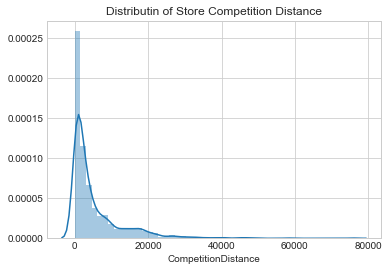

In [43]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution
sns.distplot(store.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

### The distribution is right skewed, so we'll replace missing values with the median.

In [44]:
# replace missing values in CompetitionDistance with median for the store dataset
store.CompetitionDistance.fillna(store.CompetitionDistance.median(), inplace=True)

## 2.3 Date Extraction <a class="anchor" id="2.3-bullet"></a>

In [45]:
# extract year, month, day and week of year from "Date"
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train = train.reset_index()

## 2.4 Joining Tables  <a class="anchor" id="2.4-bullet"></a>

In [46]:
df = pd.merge(train, store, how='left', on='Store')
df.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,c,a,1270.0,0
1,2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,a,a,570.0,1
2,2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,a,a,14130.0,1
3,2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,c,c,620.0,0
4,2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,a,a,29910.0,0


In [47]:
len(df)

1017209

## 2.5 Drop Subsets Of Data Where Might Cause Bias <a class="anchor" id="2.5-bullet"></a>

In [48]:
# where stores are closed, they won't generate sales, so we will remove this part of the dataset
df = df[df.Open != 0]

In [49]:
# Open isn't a variable anymore, so we'll drop it
df = df.drop('Open', axis=1)

In [50]:
# see if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [51]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [52]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

## 2.6 Feature Engineering <a class="anchor" id="2.6-bullet"></a>

In [53]:
# see what variable types we have
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
Date                   844338 non-null datetime64[ns]
Store                  844338 non-null int64
DayOfWeek              844338 non-null int64
Sales                  844338 non-null int64
Customers              844338 non-null int64
Promo                  844338 non-null int64
StateHoliday           844338 non-null object
SchoolHoliday          844338 non-null int64
Year                   844338 non-null int64
Month                  844338 non-null int64
Day                    844338 non-null int64
WeekOfYear             844338 non-null int64
StoreType              844338 non-null object
Assortment             844338 non-null object
CompetitionDistance    844338 non-null float64
Promo2                 844338 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(11), object(3)
memory usage: 109.5+ MB


In [54]:
# see what's in nominal varibles 
set(df.StateHoliday), set(df.StoreType), set(df.Assortment)

({0, 'b', '0', 'c', 'a'}, {'a', 'b', 'c', 'd'}, {'a', 'b', 'c'})

In [55]:
# StateHoliday indicates a state holiday - a = public holiday, b = Easter holiday, c = Christmas, 0 = None
# convert number 0 to string 0
df.loc[df.StateHoliday == 0,'StateHoliday'] = df.loc[df.StateHoliday == 0,'StateHoliday'].astype(str)

In [56]:
# make a copy in case I mess up anything 
df1 = df.copy()

### 2.6.1 Create new variable "AvgSales" <a class="anchor" id="2.6.1-bullet"></a>
create a variable that calculates monthly average sales for each store

In [57]:
# calculate weekly average sales
sales = df1[['Year','Month','Store','Sales']].groupby(['Year','Month','Store']).mean()
sales = sales.rename(columns={'Sales':'AvgSales'})
sales = sales.reset_index()

In [58]:
df1['sales_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
sales['sales_key']=sales['Year'].map(str) + sales['Month'].map(str) + sales['Store'].map(str)

In [59]:
# drop extra columns
sales = sales.drop(['Year','Month','Store'], axis=1)
# merge
df1 = pd.merge(df1, sales, how='left', on=('sales_key'))

### 2.6.2 Create new variable "AvgCustomer"  <a class="anchor" id="2.6.2-bullet"></a>
create a variable that calculates Monthly average number of customers for each store, becuase daily number of customer is another variable to be predicted

In [60]:
# calculate weekly average
cust = df1[['Year','Month','Store','Customers']].groupby(['Year','Month', 'Store']).mean()
cust = cust.rename(columns={'Customers':'AvgCustomer'})
cust = cust.reset_index()

In [61]:
df1['cust_key']=df1['Year'].map(str) + df1['Month'].map(str) + df1['Store'].map(str)
cust['cust_key']=cust['Year'].map(str) + cust['Month'].map(str) + cust['Store'].map(str)

In [62]:
# drop original feature Customers
df1 = df1.drop('Customers', axis=1)# drop extra columns
cust = cust.drop(['Year', 'Month', 'Store'], axis=1)

In [63]:
# merge
df1 = pd.merge(df1, cust, how="left", on=('cust_key'))

### 2.6.3 Transform Variable "StateHoliday"

In [64]:
# 0 - not a state holiday; 1- is on a state holiday
df1['StateHoliday'] = df1.StateHoliday.map({'0':0, 'a':1 ,'b' : 1,'c': 1})

In [65]:
# drop extra columns
df1 = df1.drop(['cust_key','sales_key','Store','Date'], axis=1)

# 3. Exploratory Data Analysis

In [67]:
# becasue my computer keeps crashing, I had to sample the dataset 
dfv = df.sample(n=5000, random_state=1)

In [72]:
# set up credential file for plotly
plotly.tools.set_credentials_file(username='mei_zmyang', api_key='Z8Jn8zb2xXh4lfckv9xa')

## 3.1 Correlation Heatmap
create a heatmap to see correlation between all variables

In [69]:
corr = df1.corr()

Text(0.5,1,'Correlation Heatmap')

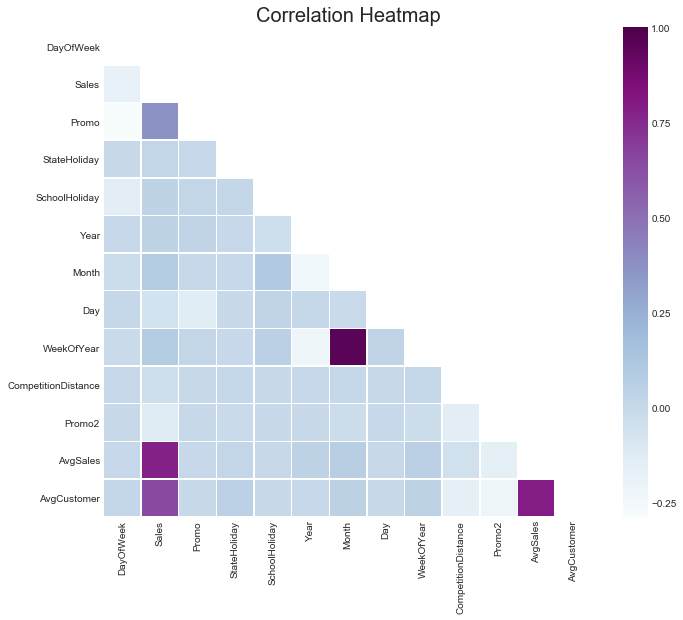

In [70]:
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

## 3.2 Sales Distribution

In [74]:
sales_dist = [go.Histogram(x=dfv.Sales, marker=dict(color='pink'))]
layout2 = go.Layout(title='Sales Distribution', xaxis=dict(title='daily sales in $'), yaxis=dict(title='number of observations'))
fig2 = go.Figure(data=sales_dist, layout=layout2)
py.iplot(fig2)

## 3.3 Customer Distribution

In [75]:
cust_dist = [go.Histogram(x=dfv.Customers, marker=dict(color=('rgb(158,202,225')))]
layout3 = go.Layout(title='Customer Distribution', 
                   xaxis=dict(title='daily total number of customers'), yaxis=dict(title='number of observations'))
fig3 = go.Figure(data=cust_dist, layout=layout3)
py.iplot(fig3)

## 3.4 Sales Over Time

In [76]:
store1_2015 = df.query('Store == 1 and Year == 2015')
store1_2013 = df.query('Store == 1 and Year == 2013')
store1_2014 = df.query('Store == 1 and Year == 2014')

In [77]:
trace_2013 = go.Scatter(
                x=store1_2013.Date,
                y=store1_2013.Sales,
                name = "2013",
                opacity = 0.8)

trace_2014 = go.Scatter(
                x=store1_2014.Date,
                y=store1_2014.Sales,
                name = "2014",
                opacity = 0.8)

trace_2015 = go.Scatter(
                x=store1_2015.Date,
                y=store1_2015.Sales,
                name = "2015",
                opacity = 0.8)

data = [trace_2013,trace_2014, trace_2015]
layout = go.Layout(title='Sales Over Time', 
                   xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## 3.5 Sales Over Days Of A Month

In [78]:
day_s = [go.Scatter(x=dfv.Day, y=dfv.Sales, mode='markers', 
                    marker=dict(size=15, color=dfv.Customers, colorbar=dict(title='Number Of Customers'),))]
layout5 = go.Layout(title='Sales Over Days Of A Month', 
                   xaxis=dict(title='Day Of Month'), yaxis=dict(title='Total Sales'))
fig5 = go.Figure(data=day_s, layout=layout5)
py.iplot(fig5)

## 3.6 Sales Over Weeks

In [79]:
trace = go.Bar(x=dfv.WeekOfYear,
                y=dfv.Sales,
                name = "WeekOfYear", marker=dict(color=dfv.WeekOfYear, colorscale='Jet'))

data = [trace]
layout = go.Layout(title='Sales Over Week Of Year', 
                   xaxis=dict(title='Week Of Year'), yaxis=dict(title='Sales'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [80]:
day_w = [go.Bar(x=dfv.DayOfWeek, y=dfv.Sales, 
                marker=dict(color=dfv.DayOfWeek,
                            colorscale ='Viridis'))]
layout6 = go.Layout(title='Sales Over Days Of A Week', 
                   xaxis=dict(title='Day Of Week'), yaxis=dict(title='Total Sales'))
fig6 = go.Figure(data=day_w, layout=layout6)
py.iplot(fig6)

## 3.7 Sales By Store Type

In [81]:
# StoreType - differentiates between 4 different store models: a, b, c, d
s_type = [go.Box(x=dfv.StoreType, y=dfv.Sales,
                 boxpoints='all', jitter=0.3, pointpos=-1.8)]
layout7 = go.Layout(title='Sales By Store Type', 
                   xaxis=dict(title='Store Type'), yaxis=dict(title='Total Sales'))
fig7 = go.Figure(data=s_type, layout=layout7)
py.iplot(fig7)

## 3.8 Sales By Assortment

In [82]:
# Assortment - describes an assortment level: a = basic, b = extra, c = extended
s_assort = [go.Box(x=dfv.Assortment, y=dfv.Sales,marker=dict(color='green'), 
                 boxpoints='all', jitter=0.3, pointpos=-1.8)]
layout8 = go.Layout(title='Sales By Assortment', 
                   xaxis=dict(title='Assortment'), yaxis=dict(title='Total Sales'))
fig8 = go.Figure(data=s_assort, layout=layout8)
py.iplot(fig8)

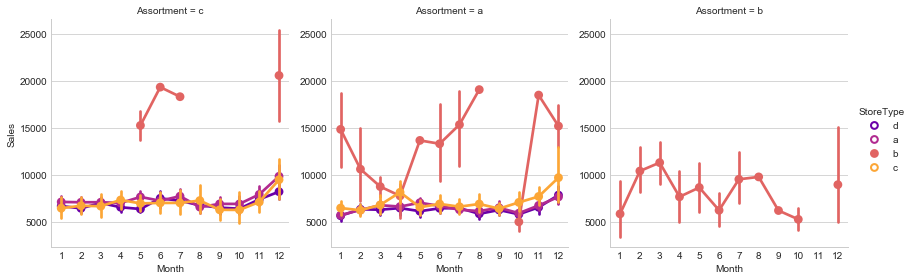

In [83]:
sns.factorplot(data = dfv, x = 'Month', y = "Sales", 
               col = 'Assortment',
               palette = 'plasma',
               hue = 'StoreType')

## 3.9 Sales vs. Number Of Customers

In [84]:
cust_s = [go.Scatter(x=dfv.Customers, y=dfv.Sales, mode='markers', 
                     marker=dict(size=20,color=dfv.CompetitionDistance,
                                 colorbar=dict(title='Competition Distance'),colorscale='Earth'))]
layout9 = go.Layout(title='Sales vs. Number Of Customers', 
                   xaxis=dict(title='Number Of Customers'), yaxis=dict(title='Sales'))
fig9 = go.Figure(data=cust_s, layout=layout9)
py.iplot(fig9)

## 3.10 Sales vs. Competition Distance

In [85]:
distance_s = [go.Scatter(x=dfv.CompetitionDistance, y=dfv.Sales, mode='markers', 
                     marker=dict(size=20,color=dfv.Customers,
                                 colorbar=dict(title='Number Of Customers'),colorscale='Jet'))]
layout10 = go.Layout(title='Sales vs. Competition Distance', 
                   xaxis=dict(title='Competition Distance'), yaxis=dict(title='Sales'))
fig10 = go.Figure(data=distance_s, layout=layout10)
py.iplot(fig10)

## 3.11 Sales By Promotion

In [86]:
s_promo = [go.Box(x=dfv.Promo, y=dfv.Sales,marker=dict(color='purple'), 
                 boxpoints='all', jitter=0.3, pointpos=-1.8)]
layout11 = go.Layout(title='Sales By Promotion', 
                   xaxis=dict(title='Promotion(0-No Promotion; 1-Promotion Period)'), yaxis=dict(title='Total Sales'))
fig11 = go.Figure(data=s_promo, layout=layout11)
py.iplot(fig11)

In [87]:
promo0 = dfv.query('Promo==0')
promo0 = promo0.rename(columns={'Sales':'No_Promotion_Sales'})
promo1 = dfv.query('Promo==1')
promo1 = promo1.rename(columns={'Sales':'Promotion_Sales'})
x1 = promo0.No_Promotion_Sales
x2 = promo1.Promotion_Sales

Text(0,0.5,'Sales')

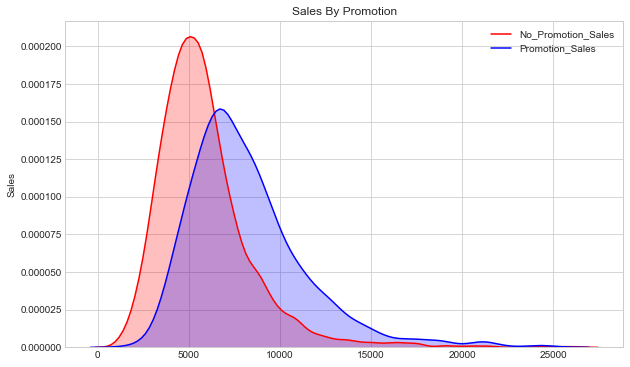

In [88]:
plt.figure(figsize=(10,6))
ax = sns.kdeplot(x1, shade=True, color="r")
ax = sns.kdeplot(x2, shade=True, color="b")
plt.title("Sales By Promotion")
plt.ylabel('Sales')

## 3.12 Pair Plot

Text(0.5,1,'Pair Plot')

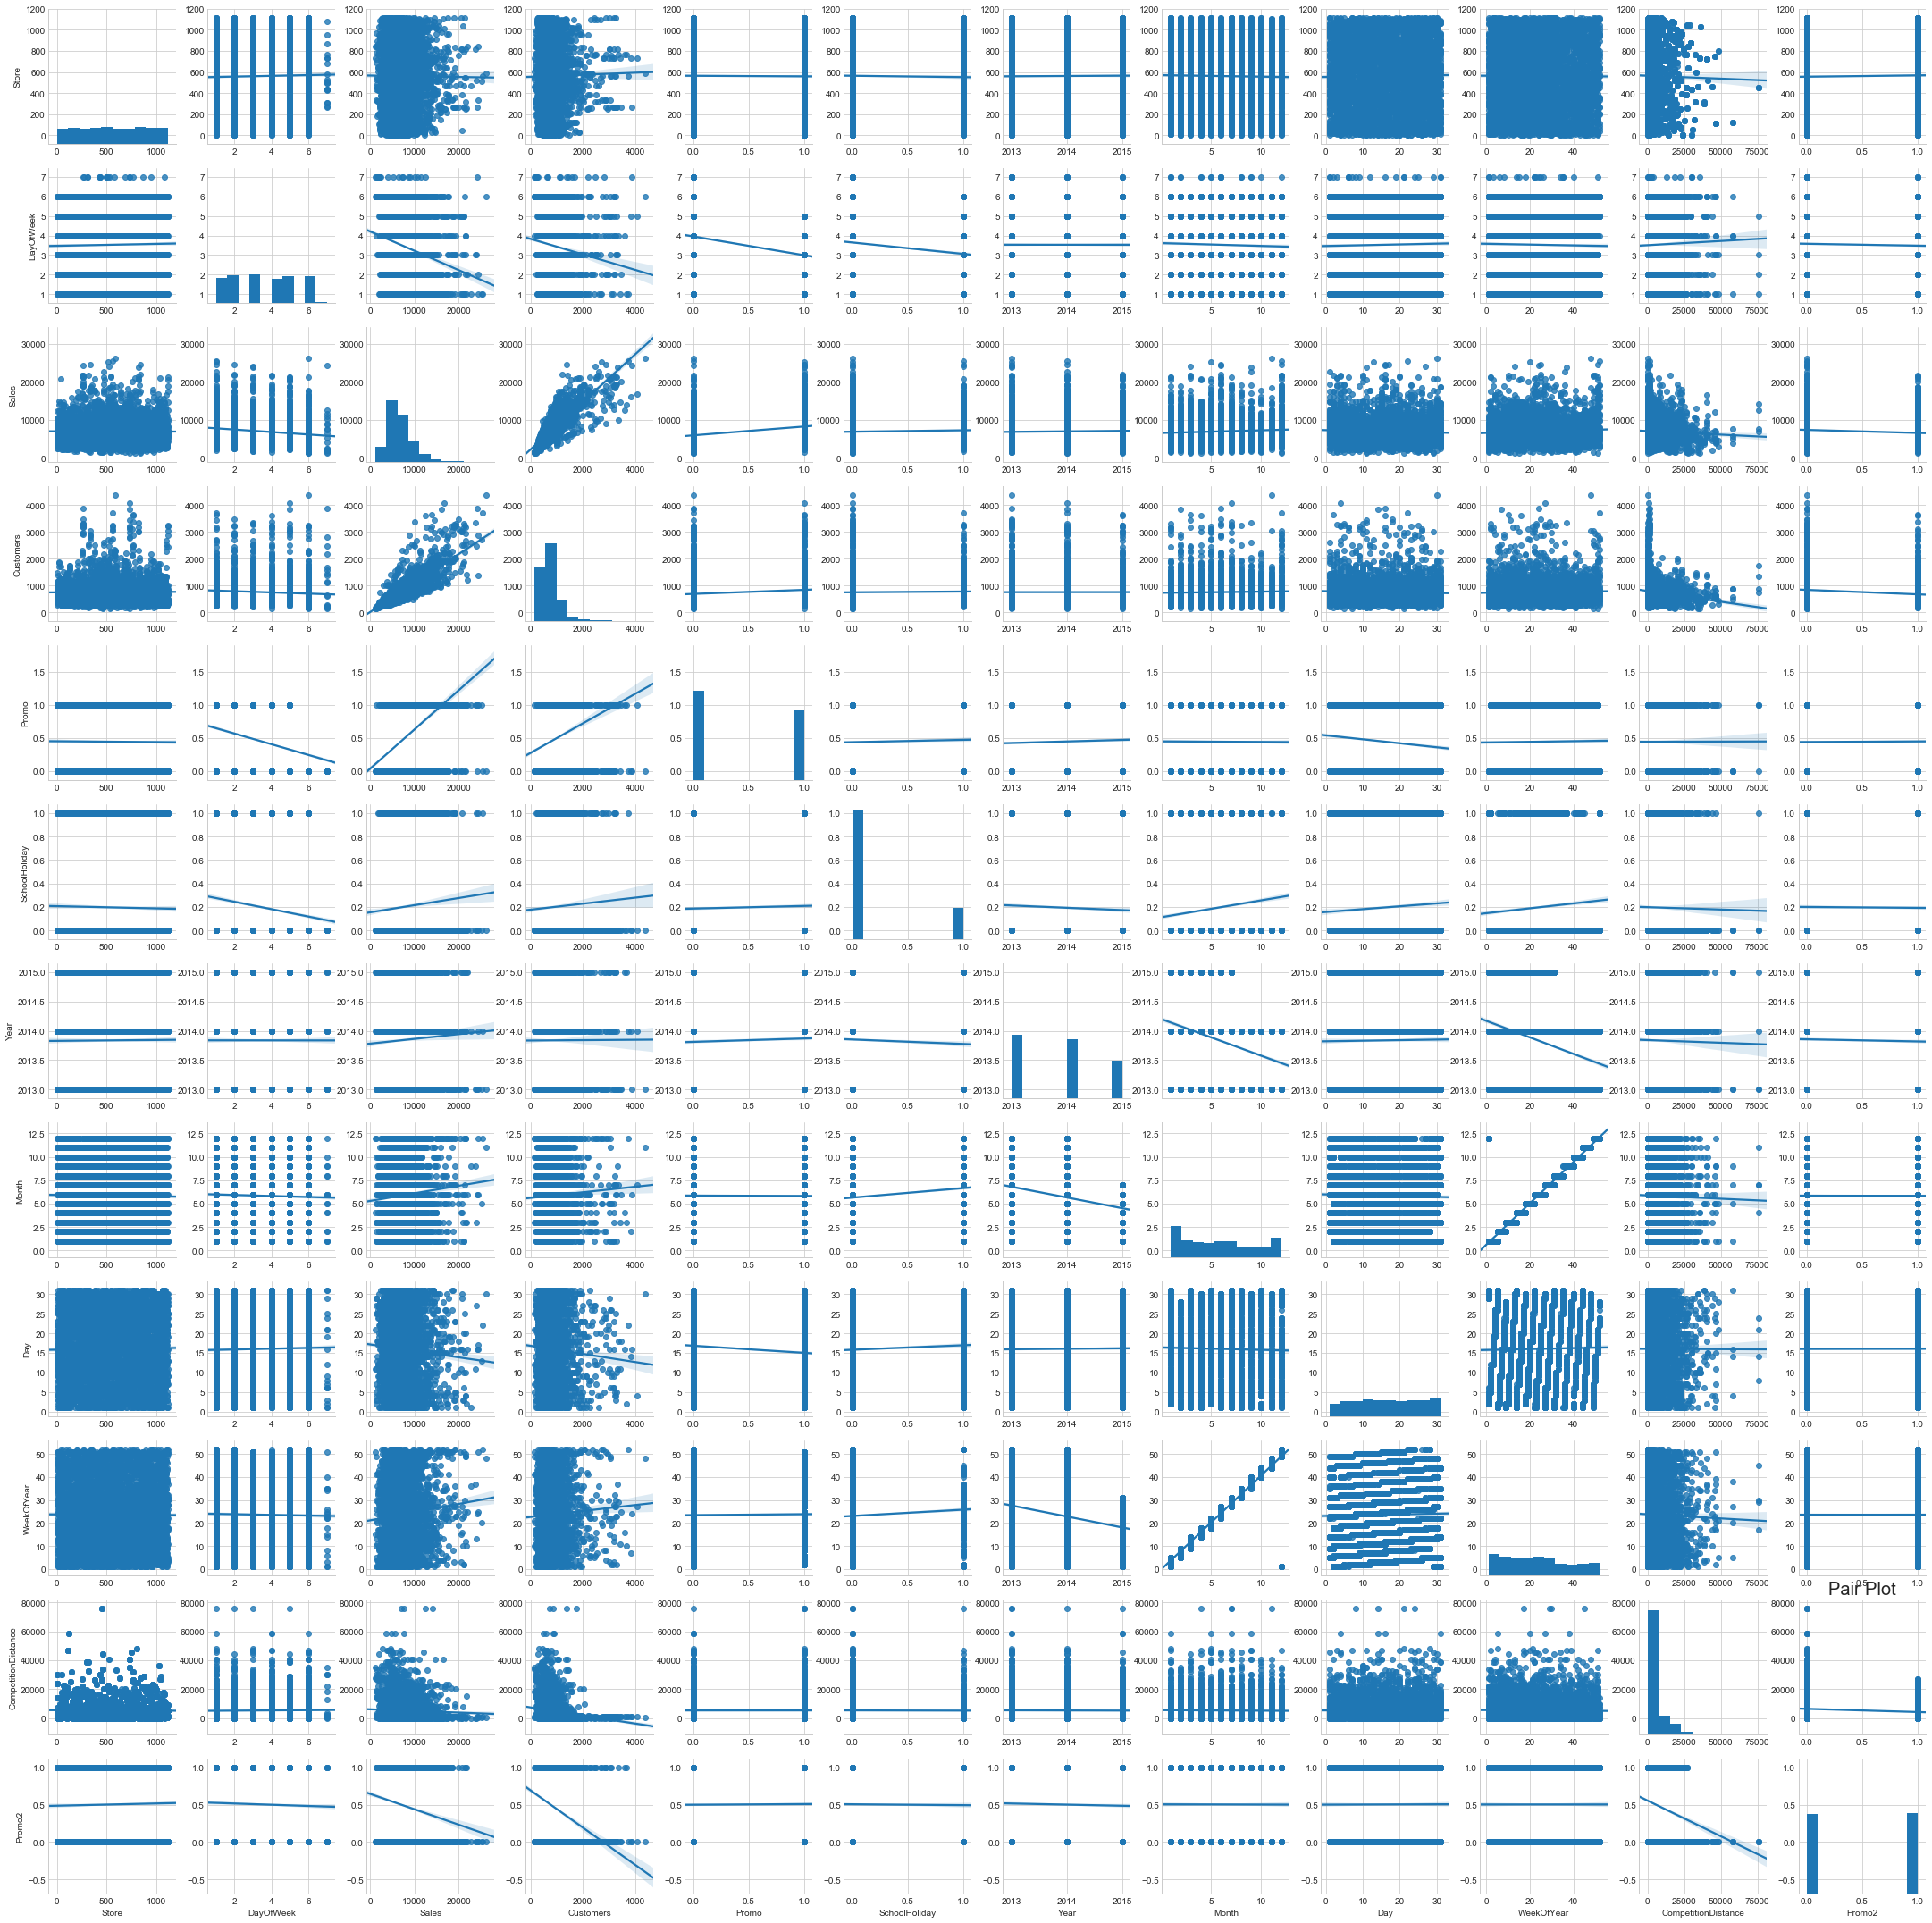

In [89]:
plt.figure()
sns.pairplot(dfv, kind='reg')
plt.title('Pair Plot', fontsize=20)

# 4. Store Sales Prediction

In [90]:
# since I ran into memorry error and wasn't able to solve it (even on AWS Sagemaker), 
# I had to use to sample dataset with 50000 observations to build ML models.
dfd = df1.sample(n=50000, random_state=1)

In [91]:
# split features and labels
X = dfd.drop('Sales', axis=1)
y = dfd. Sales

In [92]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)

In [93]:
# label nominal variables for tree based regression
xl = X.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)

In [94]:
# split training and test datasets
from sklearn.cross_validation import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

## 4.1 Linear Regression (OLS)

In [95]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(xd_train, yd_train)

In [96]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
yd_predicted = linreg.predict(xd_train)
yd_test_predicted = linreg.predict(xd_test)

print("Regresion Model Score" , ":" , linreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(xd_test, yd_test))
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.753442646309 , Out of Sample Test Score : 0.737403169518
Training RMSE : 1558.666986443433 Testing RMSE : 1569.799897811091
Training MAPE : 16.99461366128307 Testing MAPE : 17.223983944754274


## 4.2 Bayesian Ridge Regression

In [97]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(xd_train, yd_train)

In [98]:
# validation
print("Regresion Model Score" , ":" , rdgreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , rdgreg.score(xd_test, yd_test))

yd_predicted = rdgreg.predict(xd_train)
yd_test_predicted = rdgreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.753441665613 , Out of Sample Test Score : 0.737359625412
Training RMSE : 1558.6700862832317 Testing RMSE : 1569.930045421522
Training MAPE : 16.994522837423084 Testing MAPE : 17.223700672374918


## 4.3 LARS Lasso Regression

In [99]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(xd_train, yd_train)


In [100]:
print("Regresion Model Score" , ":" , lasreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(xd_test, yd_test))

yd_predicted = lasreg.predict(xd_train)
yd_test_predicted = lasreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.753424247404 , Out of Sample Test Score : 0.73727953087
Training RMSE : 1558.7251417391249 Testing RMSE : 1570.1694093096244
Training MAPE : 16.99560177298533 Testing MAPE : 17.223041874175752


## 4.4 Decision Tree Regression

In [101]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(xl_train, yl_train)

In [102]:
print("Regresion Model Score" , ":" , treereg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , treereg.score(xl_test, yl_test))

yl_predicted = treereg.predict(xl_train)
yl_test_predicted = treereg.predict(xl_test)
print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Regresion Model Score : 0.854735529008 , Out of Sample Test Score : 0.79052349769
Training RMSE : 1196.3935424504407 Testing RMSE : 1402.0619825453816
Training MAPE : 12.460619402882115 Testing MAPE : 14.72093309588586


## 4.5 Random Forest Regression

In [103]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xl_train, yl_train)

In [104]:
print("Regresion Model Score" , ":" , rdfreg.score(xl_train, yl_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(xl_test, yl_test))   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

print("Training RMSE", ":", rmse(yl_train, yl_predicted),
      "Testing RMSE", ":", rmse(yl_test, yl_test_predicted))
print("Training MAPE", ":", mape(yl_train, yl_predicted),
      "Testing MAPE", ":", mape(yl_test, yl_test_predicted))

Regresion Model Score : 0.977961011629 , Out of Sample Test Score : 0.842042973845
Training RMSE : 466.00457960996516 Testing RMSE : 1217.5001710045358
Training MAPE : 4.7442616470121886 Testing MAPE : 12.565187414882518


## 4.6 K-Nearest Neighbors Regression

In [105]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(xd_train, yd_train)

In [106]:
print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted))

Regresion Model Score : 0.627576131675 , Out of Sample Test Score : 0.576167785279
Training RMSE : 1915.6365301074293 Testing RMSE : 1994.3277777509113
Training MAPE : 22.923501535229647 Testing MAPE : 23.86797893442435


In [107]:
for x in range(1,30):
    knn = KNeighborsRegressor(n_neighbors = x)
    knnreg = knn.fit(xd_train, yd_train)
    print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

Regresion Model Score : 1.0 , Out of Sample Test Score : 0.256866205988
Regresion Model Score : 0.826050713846 , Out of Sample Test Score : 0.424274325809
Regresion Model Score : 0.762491234726 , Out of Sample Test Score : 0.486251431383
Regresion Model Score : 0.729568514266 , Out of Sample Test Score : 0.511878565603
Regresion Model Score : 0.708388348824 , Out of Sample Test Score : 0.531623892458
Regresion Model Score : 0.692113795711 , Out of Sample Test Score : 0.542002525653
Regresion Model Score : 0.681902824273 , Out of Sample Test Score : 0.547486438977
Regresion Model Score : 0.673781947099 , Out of Sample Test Score : 0.552937832005
Regresion Model Score : 0.667958786402 , Out of Sample Test Score : 0.557936759739
Regresion Model Score : 0.661613461212 , Out of Sample Test Score : 0.56189227452
Regresion Model Score : 0.656165427373 , Out of Sample Test Score : 0.563503594802
Regresion Model Score : 0.652799428399 , Out of Sample Test Score : 0.564734031852
Regresion Model 

## 4.7 Model Selection
Let's put the evaluation metrics together, and see which model performed better!

![rossmann-score](https://user-images.githubusercontent.com/32555702/37251007-8ad4710e-24bd-11e8-8ac2-682904ceb50c.JPG)

## Feature Importance

Text(0.5,0,'Relative Importance')

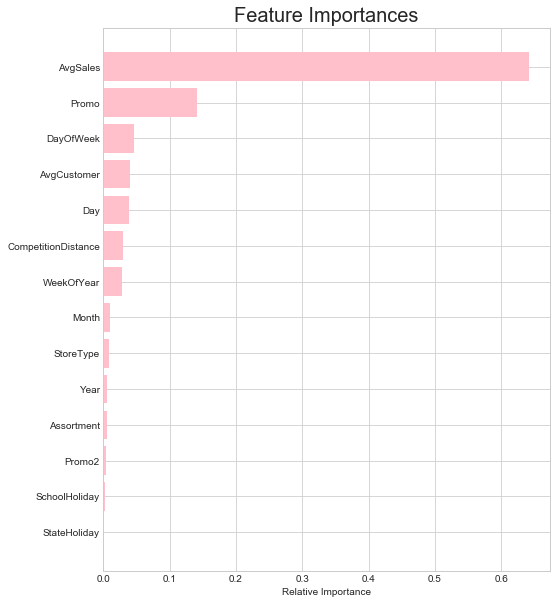

In [108]:
features = xl_train.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

State Holiday: a = public holiday, b = Easter holiday, c = Christmas, 0 = None

![cavs6skwqaapxpg](https://user-images.githubusercontent.com/32555702/37251006-8ab7650a-24bd-11e8-819f-c802f4385414.png)